In [1]:
# data import
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fruits = np.load('C:/prac/fruits_300.npy')

**fruits**는 numpy 배열

fruits_300.npy 파일에 있는 모든 데이터를 포함

In [3]:
print(fruits.shape)

(300, 100, 100)


(300, 100, 100) = (차원, 이미지 높이, 이미지 너비)

In [4]:
# 첫 번째 이미지의 첫 번쨰 행 출력
# 3차원 배열 -> 처음 2개의 인덱스를 0, 마지막 인덱스는 지정 x 또는 슬라이싱 연산자 => 첫 번째 행을 모두 선택

print(fruits[0, 0, :])

# 첫 번째 행에 있는 픽셀 100개에 들어 있는 값 출력
# Numpy 배열은 흑백 사진을 담고 있어 0 ~ 255까지의 정수값을 가짐

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


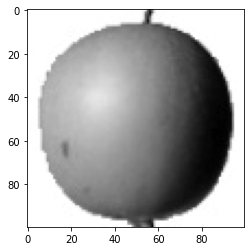

In [8]:
# matplotlib 의 imshow() 메서드를 이용하여 넘파이 배열로 저장된 이미지를 plot

plt.imshow(fruits[0], cmap= 'gray_r')
plt.show()

# 0에 가까울 수록 검게, 높은 값은 밝게 표현
# cmap = 'gray' 대신 'gray_r' 사용해 배경을 밝게 표현

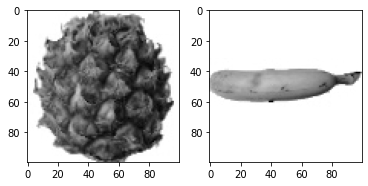

In [9]:
# 사과, 바나나, 파인애플 각 100개씩 포함
# 바나나, 파인애플 이미지 출력

fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruits[100], cmap= 'gray_r')
axs[1].imshow(fruits[200], cmap= 'gray_r')
plt.show()

matplotlib의 **subplots**를 사용하면 여러 개의 그래프를 배열처럼 쌓을 수 있음

subplots() 메서드의 두 매개변수는 그래프를 쌓을 **행과 열**을 지정

=> subplots(rows, cols)

**픽셀값 분석하기**

fruits 데이터를 사과, 파인애플, 바나나로 각각 나누기

100 x 100 이미지를 펼쳐서 길이가 10,000인 1차원 배열로 변환

In [10]:
# fruits 배열에서 순서대로 100개씩 선택하기 위 슬라이싱 연산자 사용
# reshape() 메서드를 사용해 두 번째 차원(100)과 세 번째 차원(100)을 10,000으로 합침
# 첫 번째 차원을 -1로 지정 => 자동으로 남은 차원을 할당

apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

In [12]:
print(apple.shape)
print(pineapple.shape)
print(banana.shape)

(100, 10000)
(100, 10000)
(100, 10000)


In [13]:
# 샘플의 평균값 계산
# Numpy의 mean() 메서드를 사용
# 샘플마다 픽셀의 평균값을 계산 => mean() 메서드가 평균을 계산할 축을 지정
# axis= 0 : 첫 번째 축인 행을 따라 계산
# axis= 1 : 두 번째 축인 열을 따라 계산

print(apple.mean(axis= 1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


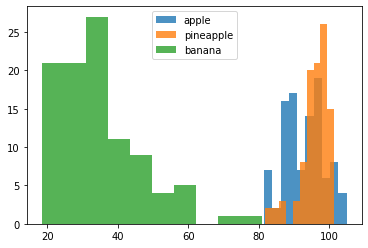

In [15]:
# 각 샘플의 평균값을 matplot의 histogram으로 출력
# alpha 매개변수를 1보다 작게 해 투명도를 조절

plt.hist(np.mean(apple, axis= 1), alpha= 0.8)
plt.hist(np.mean(pineapple, axis= 1), alpha= 0.8)
plt.hist(np.mean(banana, axis= 1), alpha= 0.8)

plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

바나나 사진의 평균값은 40 이하에 집중

사과와 파인애플은 90~100 사이에 집중

바나나의 픽셀 평균값만으로 사과나 파인애플과 구별 가능

바나나는 사진에서 차지하는 영역이 작기 때문에 평균값이 작음

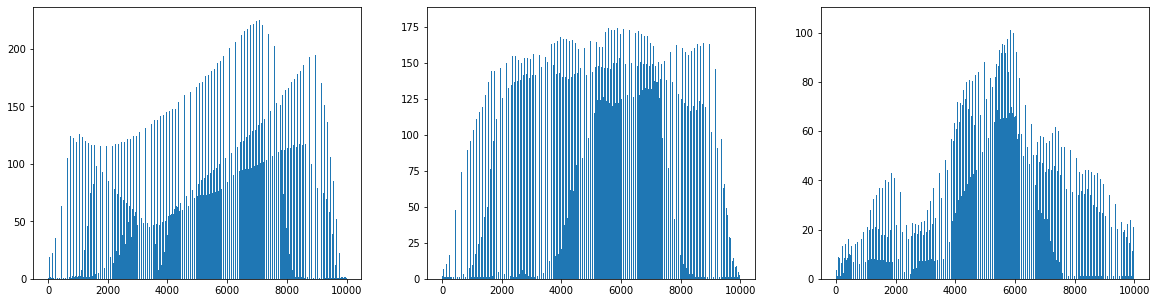

In [17]:
# 샘플의 평균값이 아닌 픽셀의 평균값 계산
# axis= 1이 아닌 axis= 0으로 지정

fig, axs= plt.subplots(1, 3, figsize= (20, 5))
axs[0].bar(range(10000), np.mean(apple, axis= 0))
axs[1].bar(range(10000), np.mean(pineapple, axis= 0))
axs[2].bar(range(10000), np.mean(banana, axis= 0))
plt.show()

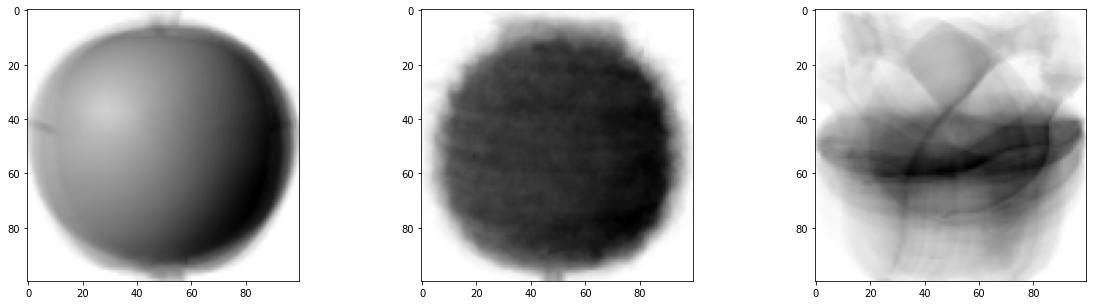

In [20]:
# 픽셀 평균값을 100x100 크기로 바꿔서 이미지로 출력
# 픽셀을 평균 낸 이미지를 모든 사진을 합쳐 놓은 대표 이미지로 생각할 수 있음

apple_mean= np.mean(apple, axis= 0).reshape(100,100)
pineapple_mean= np.mean(pineapple, axis= 0).reshape(100,100)
banana_mean= np.mean(banana, axis= 0).reshape(100,100)

fig, axs= plt.subplots(1, 3, figsize= (20, 5))
axs[0].imshow(apple_mean, cmap= 'gray_r')
axs[1].imshow(pineapple_mean, cmap= 'gray_r')
axs[2].imshow(banana_mean, cmap= 'gray_r')
plt.show()

**평균값과 가까운 사진 고르기**

In [21]:
# np.abs() 메서드를 사용해 절대값 구하기

abs_diff = np.abs(fruits - apple_mean)
# abs_diff는 (300, 100, 100)크기의 배열

abs_mean= np.mean(abs_diff, axis= (1, 2))
# 각 샘플에 대한 평균을 구하기 위해 axis에 두 번째, 세 번째 차원을 모두 지정

print(abs_mean.shape)

(300,)


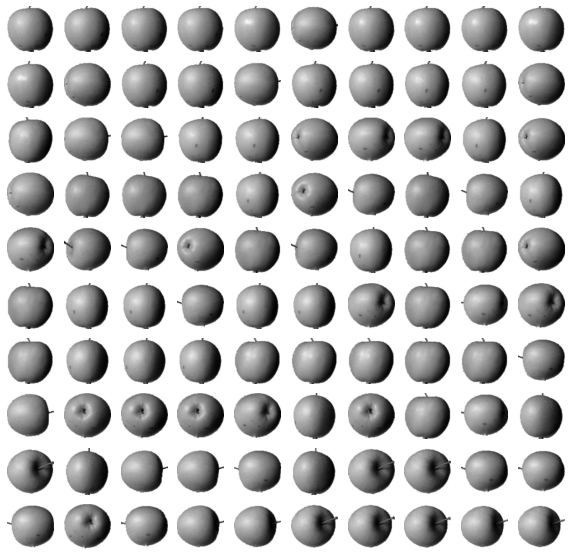

In [23]:
# 값이 작은 순서대로 100개 선택 => apple_mean과 오차가 가장 작은 샘플 100개 선택
# np.argsort() 메서드는 작은 것에서 큰 순서대로 나열
# np.argsort()로 나열한 샘플을 abs_mean 배열의 인덱스로 반환
# np.argsort() 순서대로 나열 -> abs_mean의 인덱스 반환 -> 100개로 10x10 격자로 이루어진 그래프

apple_index = np.argsort(abs_mean)[:100]

fig, axs = plt.subplots(10, 10, figsize= (10, 10))

for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap= 'gray_r')
        axs[i, j].axis('off')
        
plt.show()

**확인문제 2**

(300,)


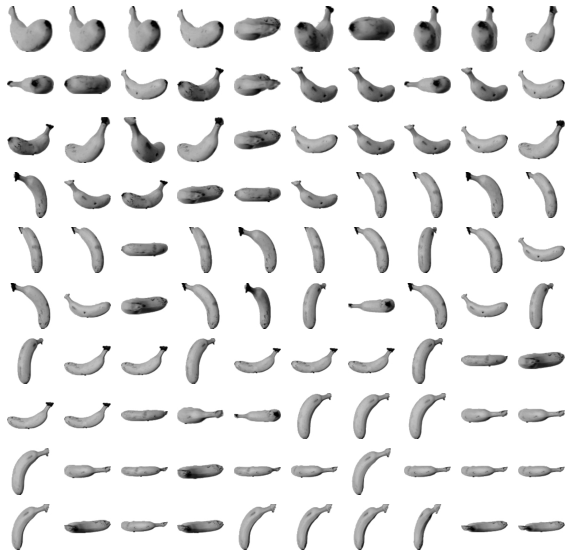

In [25]:
# banana_mean과 비슷한 사진 100장 출력

abs_diff_b = np.abs(fruits - banana_mean)

abs_mean_b = np.mean(abs_diff_b, axis= (1,2))

print(abs_mean_b.shape)

banana_index = np.argsort(abs_mean)[200:300]

fig, axs = plt.subplots(10, 10, figsize= (10, 10))

for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[banana_index[i*10 + j]], cmap= 'gray_r')
        axs[i, j].axis('off')